In [1]:
# 📦 Import pandas for data manipulation
import pandas as pd


In [5]:
# ✅ Load the CSV correctly using the real header
file_path = r"C:\Semester 3\Capstone\Project\activities_cleaned 1.csv"
df = pd.read_csv(file_path, header=0)  # No need to skip headers

print("✅ File loaded correctly. Shape:", df.shape)
df.head()


✅ File loaded correctly. Shape: (155, 28)


,Activity ID,Activity Type,Begin Timestamp,End Timestamp,Max. Elevation (Raw),Min. Elevation (Raw),Elevation Gain (Raw),Elevation Loss (Raw),Average Heart Rate (bpm),Max. Heart Rate (bpm).1,...,Begin Latitude (Decimal Degrees Raw),Begin Longitude (Decimal Degrees Raw),End Latitude (Decimal Degrees Raw),End Longitude (Decimal Degrees Raw),Temperature (Raw),Wind Speed (Raw),Wind Direction,Humidity (Raw),Condition,Rainfall
0,2284658991,Running,04/11/2017 12:07,04/11/2017 13:06,472.6,472.6,315.0,314.0,182,113,...,48.019178,7.856356,48.019369,7.855831,13.9,11,S,77,fair,no
1,2284658936,Running,03/11/2017 09:47,03/11/2017 10:35,473.2,473.2,245.0,244.0,177,100,...,48.017859,7.881881,48.019410,7.855922,11.1,3,N,100,fair,no
2,2228102647,Running,25/10/2017 16:31,25/10/2017 17:11,278.8,278.8,208.0,272.0,179,95,...,48.018396,7.880602,48.019329,7.855921,20.0,6,SSW,60,fair,no
3,2104984694,Running,13/10/2017 11:53,13/10/2017 12:41,471.6,471.6,246.0,244.0,180,109,...,48.019194,7.856334,48.019312,7.855894,17.2,5,SSO,72,fair,no
4,2084195352,Running,02/10/2017 14:51,02/10/2017 15:38,494.6,494.6,246.0,240.0,174,110,...,48.019116,7.857145,48.019371,7.856066,17.8,19,SW,77,mostly cloudy,no


In [7]:
# 🧼 Assign readable column names based on structure (manually reverse engineered)
df.columns = [
    "User_ID", "Activity_Type", "Start_Time", "End_Time", "Distance", "Distance_Dup",
    "Calories", "Calories_Dup", "Max_Heart_Rate", "Avg_Heart_Rate",
    "Pace_Min_per_KM", "Pace_Dup", "Best_Pace", "Speed", "Moving_Time", "Elapsed_Time",
    "Steps", "Device_Info", "Start_Lat", "Start_Long", "End_Lat", "End_Long",
    "Temp_C", "Wind_kmh", "Wind_Direction", "Humidity", "Weather", "Rain"
]

print("✅ Columns renamed. Here are first 3 columns:")
df.columns[:5]


✅ Columns renamed. Here are first 3 columns:


Index(['User_ID', 'Activity_Type', 'Start_Time', 'End_Time', 'Distance'], dtype='object')

In [9]:
# 🧠 Convert times to datetime format
df["Start_Time"] = pd.to_datetime(df["Start_Time"], dayfirst=True, errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], dayfirst=True, errors="coerce")

print("📅 Converted Start/End times:")
df[["Start_Time", "End_Time"]].head()


📅 Converted Start/End times:


,Start_Time,End_Time
0,2017-11-04 12:07:00,2017-11-04 13:06:00
1,2017-11-03 09:47:00,2017-11-03 10:35:00
2,2017-10-25 16:31:00,2017-10-25 17:11:00
3,2017-10-13 11:53:00,2017-10-13 12:41:00
4,2017-10-02 14:51:00,2017-10-02 15:38:00


In [11]:
# ⏱️ Calculate session duration in minutes
df["Duration_Minutes"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 60

print("🕒 Duration (minutes):")
df[["Start_Time", "End_Time", "Duration_Minutes"]].head()


🕒 Duration (minutes):


,Start_Time,End_Time,Duration_Minutes
0,2017-11-04 12:07:00,2017-11-04 13:06:00,59.0
1,2017-11-03 09:47:00,2017-11-03 10:35:00,48.0
2,2017-10-25 16:31:00,2017-10-25 17:11:00,40.0
3,2017-10-13 11:53:00,2017-10-13 12:41:00,48.0
4,2017-10-02 14:51:00,2017-10-02 15:38:00,47.0


In [13]:
# ⚡ Calculate session speed (km/h) and calorie rate (cal/min)
df["Speed_kmph"] = df["Distance"] / (df["Duration_Minutes"] / 60)
df["Calories_per_Min"] = df["Calories"] / df["Duration_Minutes"]

print("📈 Speed and Calorie Rate:")
df[["Distance", "Duration_Minutes", "Speed_kmph", "Calories_per_Min"]].head()


📈 Speed and Calorie Rate:


,Distance,Duration_Minutes,Speed_kmph,Calories_per_Min
0,472.6,59.0,480.610169,5.338983
1,473.2,48.0,591.500000,5.104167
2,278.8,40.0,418.200000,5.200000
3,471.6,48.0,589.500000,5.125000
4,494.6,47.0,631.404255,5.234043


In [19]:
# 🧾 Check column names in the current DataFrame
print("Available columns:\n", df.columns.tolist())

Available columns:
 ['User_ID', 'Activity_Type', 'Start_Time', 'End_Time', 'Distance', 'Distance_Dup', 'Calories', 'Calories_Dup', 'Max_Heart_Rate', 'Avg_Heart_Rate', 'Pace_Min_per_KM', 'Pace_Dup', 'Best_Pace', 'Speed', 'Moving_Time', 'Elapsed_Time', 'Steps', 'Device_Info', 'Start_Lat', 'Start_Long', 'End_Lat', 'End_Long', 'Temp_C', 'Wind_kmh', 'Wind_Direction', 'Humidity', 'Weather', 'Rain', 'Duration_Minutes', 'Speed_kmph', 'Calories_per_Min', 'Duration_Min']


In [21]:
# 📈 Heart Rate Reserve Ratio = (Avg HR - Min HR) / (Max HR - Min HR)
df['HR_Reserve_Ratio'] = (df['Avg_Heart_Rate'] - df['Avg_Heart_Rate'].min()) / (df['Max_Heart_Rate'] - df['Avg_Heart_Rate'].min())
print("✅ HR_Reserve_Ratio calculated:")
df[['Avg_Heart_Rate', 'Max_Heart_Rate', 'HR_Reserve_Ratio']].head()

✅ HR_Reserve_Ratio calculated:


,Avg_Heart_Rate,Max_Heart_Rate,HR_Reserve_Ratio
0,113,182,0.383929
1,100,177,0.280374
2,95,179,0.229358
3,109,180,0.354545
4,110,174,0.384615


In [23]:
# 🔥 Calories per Km = Calories / Distance
df['Calories_per_Km'] = df['Calories'] / df['Distance']
print("✅ Calories_per_Km calculated:")
df[['Calories', 'Distance', 'Calories_per_Km']].head()

✅ Calories_per_Km calculated:


,Calories,Distance,Calories_per_Km
0,315.0,472.6,0.666526
1,245.0,473.2,0.517751
2,208.0,278.8,0.746055
3,246.0,471.6,0.521628
4,246.0,494.6,0.497372


In [33]:
# 🚀 Calories per Speed = Calories / Speed_kmph
df['Calories_per_Speed'] = df['Calories'] / df['Speed_kmph']
print("✅ Calories_per_Speed calculated:")
df[['Calories', 'Speed_kmph', 'Calories_per_Speed']].head()


✅ Calories_per_Speed calculated:


,Calories,Speed_kmph,Calories_per_Speed
0,315.0,480.610169,0.655417
1,245.0,591.500000,0.414201
2,208.0,418.200000,0.497370
3,246.0,589.500000,0.417303
4,246.0,631.404255,0.389608


In [37]:
# 📁 Exporting the DataFrame with new KPI columns to your desired location
output_path = r"C:\Semester 3\Capstone\Project\Updated_Activity_Data_With_KPIs.xlsx"
df.to_excel(output_path, index=False)

# ✅ Confirmation message
print(f"✅ Excel file saved successfully at:\n{output_path}")


✅ Excel file saved successfully at:
C:\Semester 3\Capstone\Project\Updated_Activity_Data_With_KPIs.xlsx


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load session-level KPI data
df_session = pd.read_excel(r"C:\Semester 3\Capstone\Project\Updated_Activity_Data_With_KPIs.xlsx")

print("✅ Session data loaded:", df_session.shape)
df_session.head()


✅ Session data loaded: (155, 35)


,User_ID,Activity_Type,Start_Time,End_Time,Distance,Distance_Dup,Calories,Calories_Dup,Max_Heart_Rate,Avg_Heart_Rate,...,Humidity,Weather,Rain,Duration_Minutes,Speed_kmph,Calories_per_Min,Duration_Min,HR_Reserve_Ratio,Calories_per_Km,Calories_per_Speed
0,2284658991,Running,2017-11-04 12:07:00,2017-11-04 13:06:00,472.6,472.6,315.0,314.0,182,113,...,77,fair,no,59,480.610169,5.338983,59,0.383929,0.666526,0.655417
1,2284658936,Running,2017-11-03 09:47:00,2017-11-03 10:35:00,473.2,473.2,245.0,244.0,177,100,...,100,fair,no,48,591.500000,5.104167,48,0.280374,0.517751,0.414201
2,2228102647,Running,2017-10-25 16:31:00,2017-10-25 17:11:00,278.8,278.8,208.0,272.0,179,95,...,60,fair,no,40,418.200000,5.200000,40,0.229358,0.746055,0.497370
3,2104984694,Running,2017-10-13 11:53:00,2017-10-13 12:41:00,471.6,471.6,246.0,244.0,180,109,...,72,fair,no,48,589.500000,5.125000,48,0.354545,0.521628,0.417303
4,2084195352,Running,2017-10-02 14:51:00,2017-10-02 15:38:00,494.6,494.6,246.0,240.0,174,110,...,77,mostly cloudy,no,47,631.404255,5.234043,47,0.384615,0.497372,0.389608


C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129728 (\N{ANATOMICAL HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


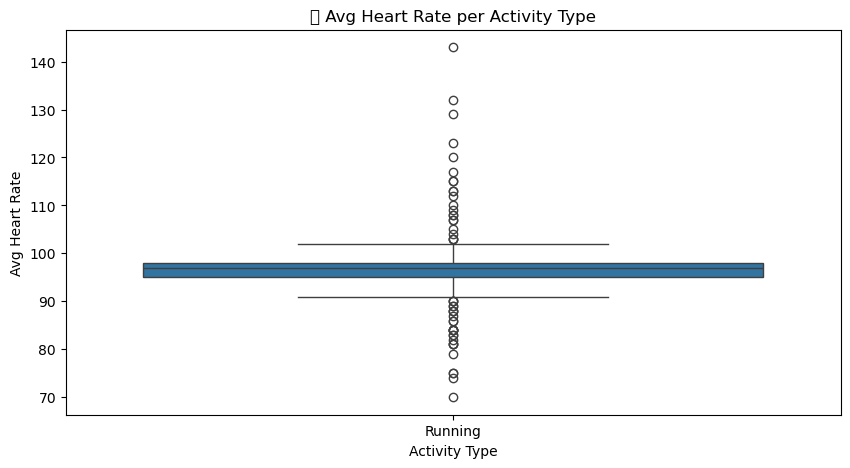

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_session, x='Activity_Type', y='Avg_Heart_Rate')
plt.title("🫀 Avg Heart Rate per Activity Type")
plt.xlabel("Activity Type")
plt.ylabel("Avg Heart Rate")
plt.show()


C:\Users\sriha\AppData\Local\Temp\ipykernel_19516\3018656645.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


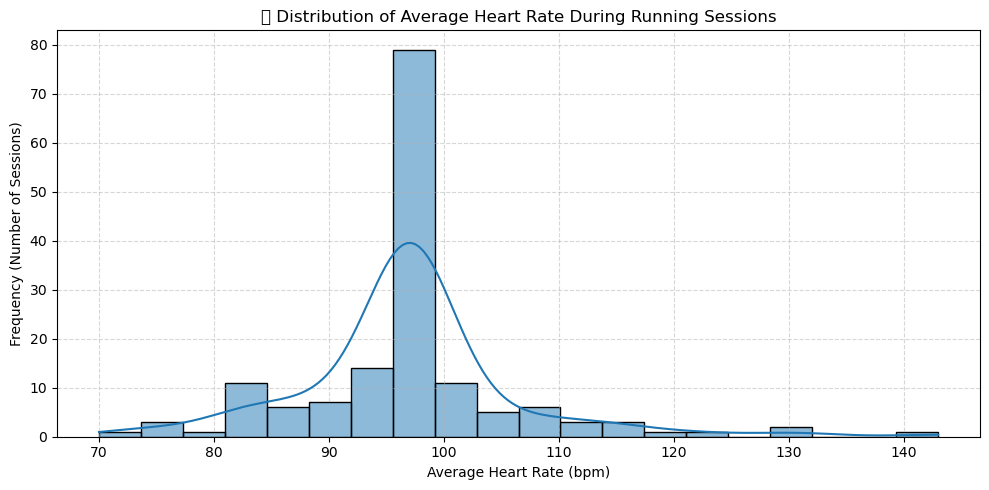

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Plotting histogram of Avg Heart Rate
plt.figure(figsize=(10, 5))
sns.histplot(data=df_session, x='Avg_Heart_Rate', kde=True, bins=20)

# ✅ Adding units and labels
plt.title("📈 Distribution of Average Heart Rate During Running Sessions")
plt.xlabel("Average Heart Rate (bpm)")  # bpm = beats per minute
plt.ylabel("Frequency (Number of Sessions)")

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


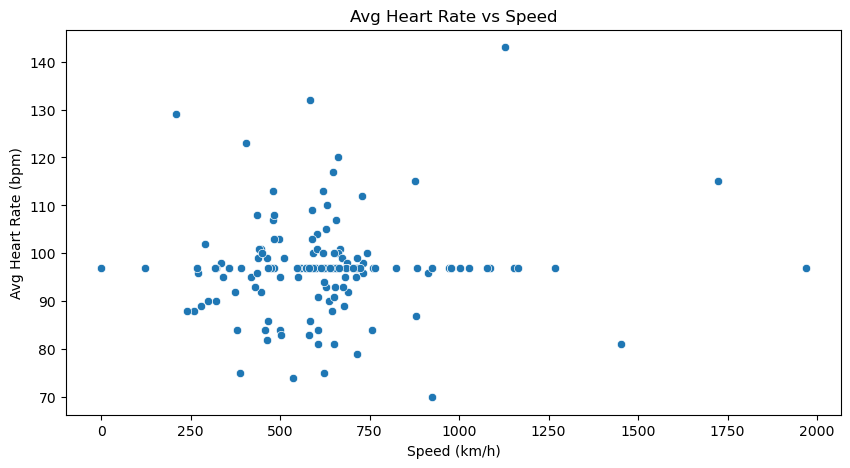

In [49]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_session, x='Speed_kmph', y='Avg_Heart_Rate')
plt.title("Avg Heart Rate vs Speed")
plt.xlabel("Speed (km/h)")
plt.ylabel("Avg Heart Rate (bpm)")
plt.show()


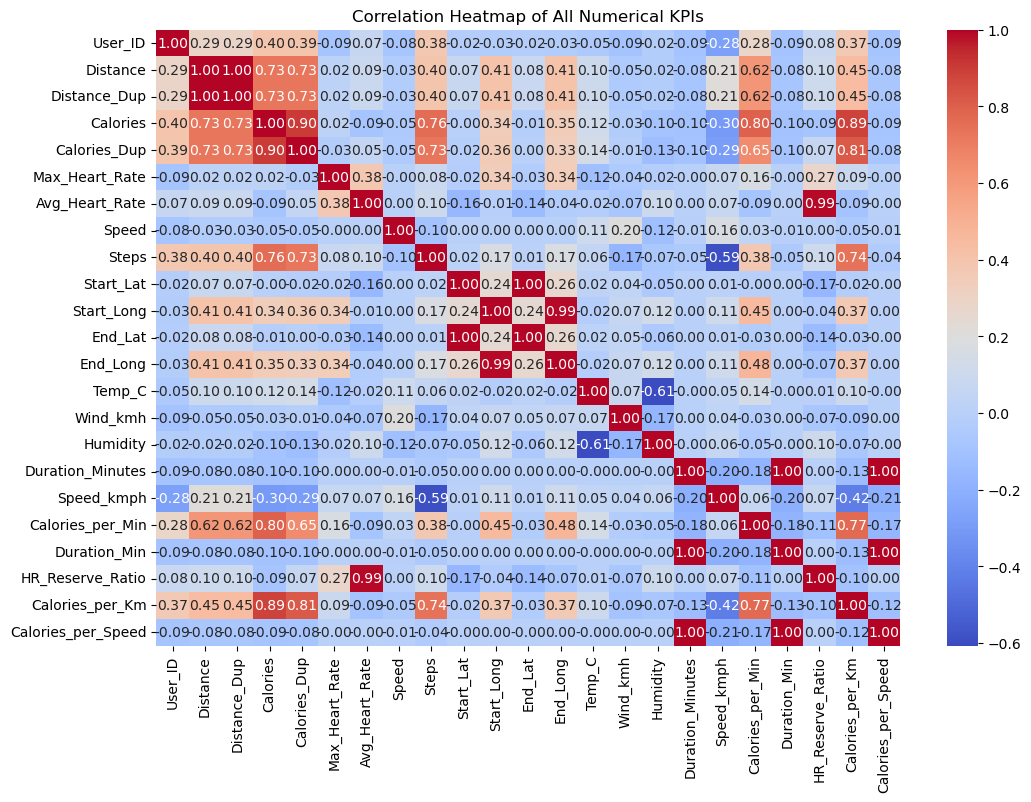

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_session.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Numerical KPIs")
plt.show()


C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


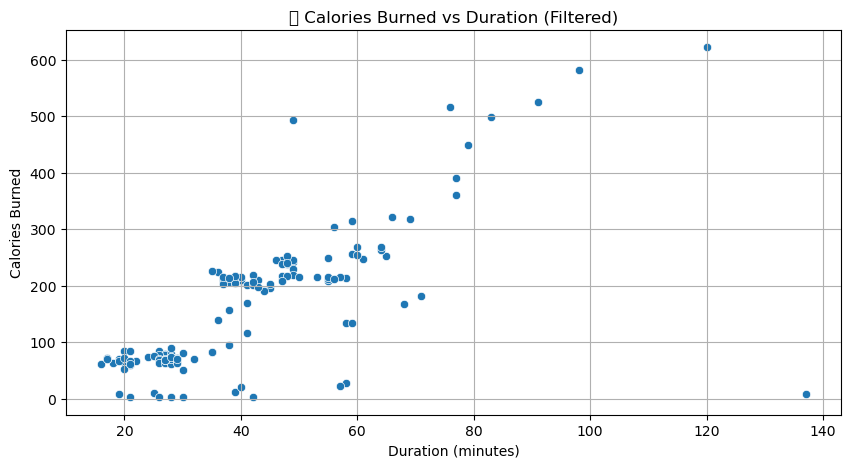

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out unreasonable durations (e.g., > 500 minutes)
df_filtered = df_session[df_session['Duration_Minutes'] < 500]

# 📈 Re-plot Calories vs Duration with cleaner axis
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='Duration_Minutes', y='Calories')
plt.title("🔥 Calories Burned vs Duration (Filtered)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.show()
